# Pyramide 3 faces avec rotation autour de Z

Calcul l'aire de contact en fonction des paramètres de tilt entre la surface indentée et l'indenteur, de rotation autour de Z et de profondeur d'indentation z.

On définit les 3 plans qui constituent les 3 faces de notre indenteur pyramidal ainsi que le plan de la surface indentée.

\begin{eqnarray}
P_1 &=& \sin(R_y)\cos(R_z)x+\sin(R_y)\sin(R_z)y+\cos(R_y)z+d_1 = 0\\
P_2 &=& \sin(R_y)\cos(R_z+\frac{2\pi}{3})x+\sin(R_y)\sin(R_z+\frac{2\pi}{3})y+\cos(R_y)z+d_2 = 0\\
P_3 &=& \sin(R_y)\cos(R_z+\frac{4\pi}{3})x+\sin(R_y)\sin(R_z+\frac{4\pi}{3})y+\cos(R_y)z+d_3 = 0\\
P_4 &=& \sin(\phi)\cos(\theta)x-\sin(\theta)y+\cos(\phi)\cos(\theta)z+d_4 = 0
\end{eqnarray}

L'obtention des points $A$, $B$ et $C$ les extrémités du triangle formé par l'indentation est donnée par l'intersection des plans tel que :

\begin{eqnarray}
P_1 \cap P_2 \cap P_4 \Longrightarrow P_{tA}\\
P_1 \cap P_3 \cap P_4 \Longrightarrow P_{tB}\\
P_2 \cap P_3 \cap P_4 \Longrightarrow P_{tC}
\end{eqnarray}

En posant $d_1 = d_2 = d_3$ = 0 et $d_4 = -h$, la profondeur de l'indentation. L'obtention des coordonées des points $A$, $B$ et $C$ s'obtient par la résolution des trois systèmes matriciels définit par l'intersection des trois plans.

Dès lors, l'aire de contact obtenue peut être calculée par la formule de Héron ($a$, $b$ et $c$ sont les longueurs respectives des trois côtés du triangle:
$$S = \sqrt{p(p-a)(p-b)(p-c)}\ \ avec\ \ p=\frac{a+b+c}{2}$$

Projected Area = 31.35254685840797
Corrected Area Factor = 31.35254685840797
Corrective Factor = 1.2796957901391008


<IPython.core.display.Javascript object>


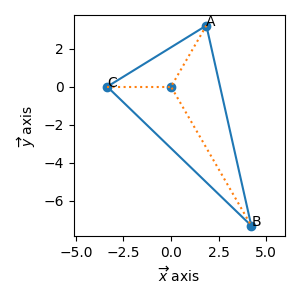

{'x': 1.8546684397013031, 'y': 3.212379968757151, 'z': -0.8542289965596368}
{'x': 4.2147218530528505, 'y': -7.3001123892583895, 'z': -1.9412297865440296}
{'x': -3.3517970224775224, 'y': 1.1826960313158549e-15, 'z': -0.7718905832148832}


In [12]:
import numpy as np
from numpy.linalg import inv,det
import matplotlib.pylab as plt
%matplotlib notebook

class point:
    def __init__(self, X):
        self.x = X[0][0]
        self.y = X[1][0]
        self.z = X[2][0]
    
    def ChangeX(self, x):
        self.x = x
    def ChangeY(self, y):
        self.y = y
    def ChangeZ(self, z):
        self.z = z
    def ChangeAll(self, x,y,z):
        self.x = x
        self.y = y
        self.z = z

Rz = 0/180*np.pi #30°
#Ry = np.arctan(2**0.5) #Si CC
Ry = 24.73*np.pi/180 #24.73 Si BK

phi = 4*np.pi/180 #Autour de Y
theta = 5*np.pi/180 #Autour de X
h = 1

MatA = np.array([[np.sin(Ry)*np.cos(Rz), np.sin(Ry)*np.sin(Rz) , np.cos(Ry)],
                [np.sin(Ry)*np.cos(Rz+2*np.pi/3), np.sin(Ry)*np.sin(Rz+2*np.pi/3) , np.cos(Ry)],
                [np.sin(phi)*np.cos(theta), -np.sin(theta), np.cos(phi)*np.cos(theta)]])
YA = np.array([[0],[0],[-h]])
PtA = point(inv(MatA).dot(YA))

MatB = np.array([[np.sin(Ry)*np.cos(Rz), np.sin(Ry)*np.sin(Rz) , np.cos(Ry)],
                [np.sin(Ry)*np.cos(Rz+4*np.pi/3), np.sin(Ry)*np.sin(Rz+4*np.pi/3) , np.cos(Ry)],
                [np.sin(phi)*np.cos(theta), -np.sin(theta), np.cos(phi)*np.cos(theta)]])
YB = np.array([[0],[0],[-h]])
PtB = point(inv(MatB).dot(YB))

MatC = np.array([[np.sin(Ry)*np.cos(Rz+2*np.pi/3), np.sin(Ry)*np.sin(Rz+2*np.pi/3) , np.cos(Ry)],
                [np.sin(Ry)*np.cos(Rz+4*np.pi/3), np.sin(Ry)*np.sin(Rz+4*np.pi/3) , np.cos(Ry)],
                [np.sin(phi)*np.cos(theta), -np.sin(theta), np.cos(phi)*np.cos(theta)]])
YC = np.array([[0],[0],[-h]])
PtC = point(inv(MatC).dot(YC))

a = ((PtA.x-PtB.x)**2 + (PtA.y-PtB.y)**2 + (PtA.z-PtB.z)**2)**0.5
b = ((PtA.x-PtC.x)**2 + (PtA.y-PtC.y)**2 + (PtA.z-PtC.z)**2)**0.5
c = ((PtC.x-PtB.x)**2 + (PtC.y-PtB.y)**2 + (PtC.z-PtB.z)**2)**0.5
p = (a+b+c)/2
Aire = (p*(p-a)*(p-b)*(p-c))**0.5
print("Projected Area =", Aire)

print("Corrected Area Factor =", Aire/h**2)
print("Corrective Factor =", Aire/h**2/24.5)

fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(111)
ax.scatter([PtA.x, PtB.x, PtC.x, 0], [PtA.y, PtB.y, PtC.y ,0])
ax.plot([PtA.x, PtB.x, PtC.x, PtA.x], [PtA.y, PtB.y, PtC.y ,PtA.y])
ax.plot([PtA.x, 0, PtB.x], [PtA.y, 0, PtB.y], color="C1", linestyle=":")
ax.plot([PtC.x, 0], [PtC.y, 0], color="C1", linestyle=":")
ax.text(PtA.x, PtA.y, "A")
ax.text(PtB.x, PtB.y, "B")
ax.text(PtC.x, PtC.y, "C")
ax.set_xlabel("$\overrightarrow{x}$ axis")
ax.set_ylabel("$\overrightarrow{y}$ axis")
ax.axis("equal")
plt.tight_layout()
plt.show()

#plt.savefig("X5Y4.svg")

print(PtA.__dict__)
print(PtB.__dict__)
print(PtC.__dict__)

# Matrice des coefficients d'aire en fonction du titlt



# Pyramide 3 faces, problème inverse

A partir des 3 points extrêmes des arrêtes, on calcule l'aire de contact, la fonction d'aire, la profondeur max d'indentation ainsi que les paramètres de tilt et de rotation autour de z.

La démarche est la même, la non-linéarité introduite par les fonctions trigonométriques implique une résolution par une méthode numérique.

Projected Area = 16620.4030 nm^2
Corrected Area Factor = 28.0439
Rotation autour de Z : -60.7499°
Tilt autour de Y : -5.5211°
Tilt autour de X : -0.3438°
Profondeur h max théorique : 24.3445 nm


<IPython.core.display.Javascript object>


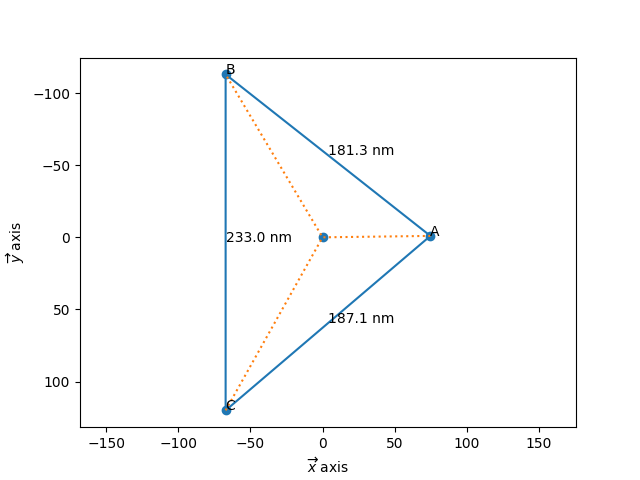

In [14]:
from sympy import sin, cos, nsolve, Symbol
import sympy
import numpy as np
import mpmath
mpmath.mp.dps = 15

d1 = Symbol('d1')
d2 = Symbol('d2')
d3 = Symbol('d3')
d4 = Symbol('d4')

ZB = Symbol('ZB')
ZC = Symbol('ZC')

Rz = Symbol('Rz')

XD = Symbol('XD')
YD = Symbol('YD')
ZD = Symbol('ZD')

phi = Symbol('phi')
theta = Symbol('theta')

PA = point([[377], [264], [0]])
PB = point([[235], [152], [ZB]])
PC = point([[235], [385], [ZC]])
PD = point([[XD], [YD], [ZD]])

f1 = sin(Ry)*cos(Rz)*PA.x+sin(Ry)*sin(Rz)*PA.y+cos(Ry)*PA.z+d1
f2 = sin(Ry)*cos(Rz)*PB.x+sin(Ry)*sin(Rz)*PB.y+cos(Ry)*PB.z+d1
f3 = sin(Ry)*cos(Rz)*PD.x+sin(Ry)*sin(Rz)*PD.y+cos(Ry)*PD.z+d1

f4 = sin(Ry)*cos(Rz+2*np.pi/3)*PA.x+sin(Ry)*sin(Rz+2*np.pi/3)*PA.y+cos(Ry)*PA.z+d2
f5 = sin(Ry)*cos(Rz+2*np.pi/3)*PC.x+sin(Ry)*sin(Rz+2*np.pi/3)*PC.y+cos(Ry)*PC.z+d2
f6 = sin(Ry)*cos(Rz+2*np.pi/3)*PD.x+sin(Ry)*sin(Rz+2*np.pi/3)*PD.y+cos(Ry)*PD.z+d2

f7 = sin(Ry)*cos(Rz+4*np.pi/3)*PB.x+sin(Ry)*sin(Rz+4*np.pi/3)*PB.y+cos(Ry)*PB.z+d3
f8 = sin(Ry)*cos(Rz+4*np.pi/3)*PC.x+sin(Ry)*sin(Rz+4*np.pi/3)*PC.y+cos(Ry)*PC.z+d3
f9 = sin(Ry)*cos(Rz+4*np.pi/3)*PD.x+sin(Ry)*sin(Rz+4*np.pi/3)*PD.y+cos(Ry)*PD.z+d3

RES = nsolve((f1, f2, f3, f4, f5, f6, f7, f8, f9),
             (d1, d2, d3, ZB, ZC, Rz, XD, YD, ZD),
             (0, 0, 0, 0, 0, 0, 0, 0, 0))

Rz = RES[5]
PB.ChangeZ(RES[3])
PC.ChangeZ(RES[4])
PD.ChangeAll(RES[6], RES[7], RES[8])

PA.ChangeAll(PA.x-PD.x, PA.y-PD.y, PA.z-PD.z)
PB.ChangeAll(PB.x-PD.x, PB.y-PD.y, PB.z-PD.z)
PC.ChangeAll(PC.x-PD.x, PC.y-PD.y, PC.z-PD.z)
PD.ChangeAll(PD.x-PD.x, PD.y-PD.y, PD.z-PD.z)

a = ((PA.x-PB.x)**2 + (PA.y-PB.y)**2 + (PA.z-PB.z)**2)**0.5
b = ((PA.x-PC.x)**2 + (PA.y-PC.y)**2 + (PA.z-PC.z)**2)**0.5
c = ((PC.x-PB.x)**2 + (PC.y-PB.y)**2 + (PC.z-PB.z)**2)**0.5
p = (a+b+c)/2
Aire = (p*(p-a)*(p-b)*(p-c))**0.5
print("Projected Area = %.4f nm^2"%Aire)

f10 = sin(phi)*cos(theta)*PA.x - sin(theta)*PA.y + cos(phi)*cos(theta)*PA.z + d4
f11 = sin(phi)*cos(theta)*PB.x - sin(theta)*PB.y + cos(phi)*cos(theta)*PB.z + d4 
f12 = sin(phi)*cos(theta)*PC.x - sin(theta)*PC.y + cos(phi)*cos(theta)*PC.z + d4

RES = nsolve((f10, f11, f12),
             (phi, theta, d4),
             (0, 0, 0))
phi = RES[0]
theta = RES[1]
h = RES[2]

print("Corrected Area Factor = %.4f"%(Aire/h**2))
print("Rotation autour de Z : %.4f°"%(Rz*180/np.pi))
print("Tilt autour de Y : %.4f°"%(RES[0]*180/np.pi))
print("Tilt autour de X : %.4f°"%(RES[1]*180/np.pi))
print("Profondeur h max théorique : %.4f nm"%(h))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter([PA.x, PB.x, PC.x, PD.x], [PA.y, PB.y, PC.y , PD.y])
ax.plot([PA.x, PB.x, PC.x, PA.x], [PA.y, PB.y, PC.y ,PA.y])
ax.plot([PA.x, PD.x, PB.x], [PA.y, PD.y, PB.y], color="C1", linestyle=":")
ax.plot([PC.x, PD.x], [PC.y, PD.y], color="C1", linestyle=":")
ax.text(PA.x, PA.y, "A")
ax.text(PB.x, PB.y, "B")
ax.text(PC.x, PC.y, "C")
ax.text((PC.x+PB.x)/2, (PC.y+PB.y)/2, "%.1f nm"%c )
ax.text((PA.x+PB.x)/2, (PA.y+PB.y)/2, "%.1f nm"%a )
ax.text((PA.x+PC.x)/2, (PA.y+PC.y)/2, "%.1f nm"%b )
ax.set_xlabel("$\overrightarrow{x}$ axis")
ax.set_ylabel("$\overrightarrow{y}$ axis")
#ax.set_ylim(ax.get_ylim()[1],ax.get_ylim()[0])
plt.gca().invert_yaxis()
#plt.gca().invert_xaxis()

ax.axis("equal")
plt.show()